In [1]:
from dateutil.parser import parse
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('./data/trump_tweets.csv', parse_dates=["month/day"])
df["month/day"] = pd.to_datetime(df["month/day"])
df.head()

,created_date,created_at,favorite_count,id_str,is_retweet,retweet_count,sentiment.compound,sentiment.neg,sentiment.neu,sentiment.pos,...,month/day,year,month,year_month,day,day of week,hour,week,year_week,text encoded
0,2019-09-27 19:41:18+00:00,Fri Sep 27 19:41:18 +0000 2019,65740.0,1.177670e+18,False,23918.0,0.0000,0.000,1.000,0.000,...,2019-09-27,2019.0,9.0,2019-09,27.0,5.0,15.0,38.0,2019-38,b'I AM DRAINING THE SWAMP! https://t.co/U7WxKr...
1,2019-09-27 15:24:05+00:00,Fri Sep 27 15:24:05 +0000 2019,76955.0,1.177600e+18,False,17995.0,0.4199,0.075,0.788,0.137,...,2019-09-27,2019.0,9.0,2019-09,27.0,5.0,11.0,38.0,2019-38,b'If that perfect phone call with the Presiden...
2,2019-09-27 13:42:57+00:00,Fri Sep 27 13:42:57 +0000 2019,70167.0,1.177580e+18,False,19027.0,0.7661,0.000,0.864,0.136,...,2019-09-27,2019.0,9.0,2019-09,27.0,5.0,9.0,38.0,2019-38,b'Sounding more and more like the so-called Wh...
3,2019-09-27 13:32:06+00:00,Fri Sep 27 13:32:06 +0000 2019,62878.0,1.177580e+18,False,15898.0,-0.4753,0.219,0.781,0.000,...,2019-09-27,2019.0,9.0,2019-09,27.0,5.0,9.0,38.0,2019-38,b'The Democrats are now to be known as the DO ...
4,2019-09-27 13:29:18+00:00,Fri Sep 27 13:29:18 +0000 2019,88719.0,1.177580e+18,False,26553.0,-0.7177,0.150,0.850,0.000,...,2019-09-27,2019.0,9.0,2019-09,27.0,5.0,9.0,38.0,2019-38,b'Rep. Adam Schiff totally made up my conversa...


In [2]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


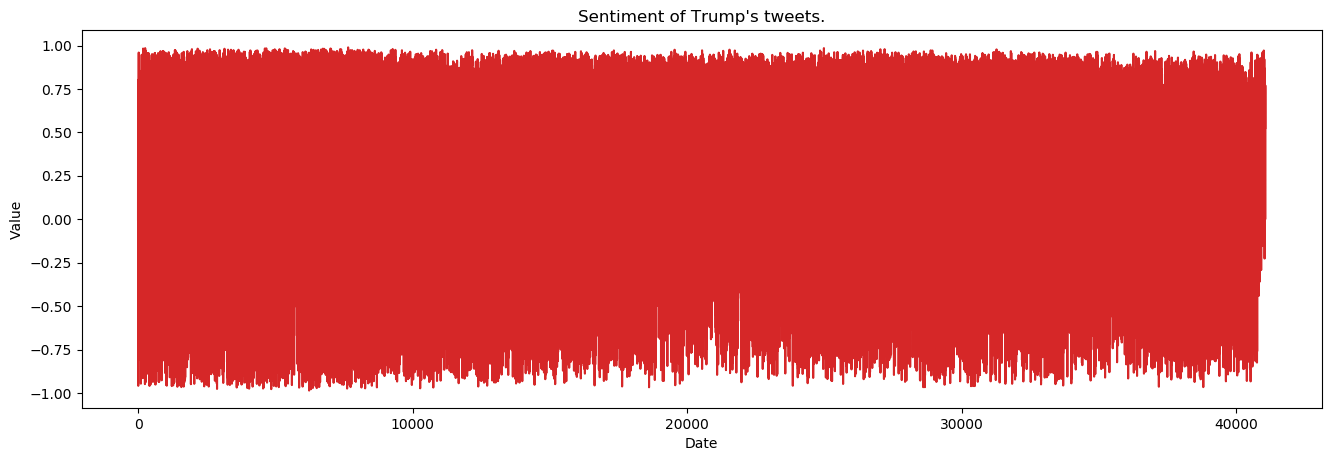

In [3]:
plot_df(df, x=df.index, y=df["sentiment.compound"], title="Sentiment of Trump's tweets.")

In [11]:
approval_rating_df = pd.read_csv('./data/approval_polllist.csv', parse_dates=["enddate"])
approval_rating_df = approval_rating_df.loc[approval_rating_df['pollster'] == 'Gallup']
approval_rating_df.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
1,Donald Trump,All polls,10/13/19,1/20/17,2017-01-22,Gallup,B,1500.0,a,0.245429,...,45.0,46.07889,43.3868,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/17,10/13/19 19:10
3,Donald Trump,All polls,10/13/19,1/21/17,2017-01-23,Gallup,B,1500.0,a,0.226788,...,46.0,46.07889,44.3868,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/17,10/13/19 19:10
5,Donald Trump,All polls,10/13/19,1/22/17,2017-01-24,Gallup,B,1500.0,a,0.212047,...,45.0,47.07889,43.3868,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/17,10/13/19 19:10
10,Donald Trump,All polls,10/13/19,1/23/17,2017-01-25,Gallup,B,1500.0,a,0.200168,...,45.0,47.07889,43.3868,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49245,77257,1/26/17,10/13/19 19:10
13,Donald Trump,All polls,10/13/19,1/24/17,2017-01-26,Gallup,B,1500.0,a,0.190472,...,48.0,46.07889,46.3868,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49242,77254,1/27/17,10/13/19 19:10


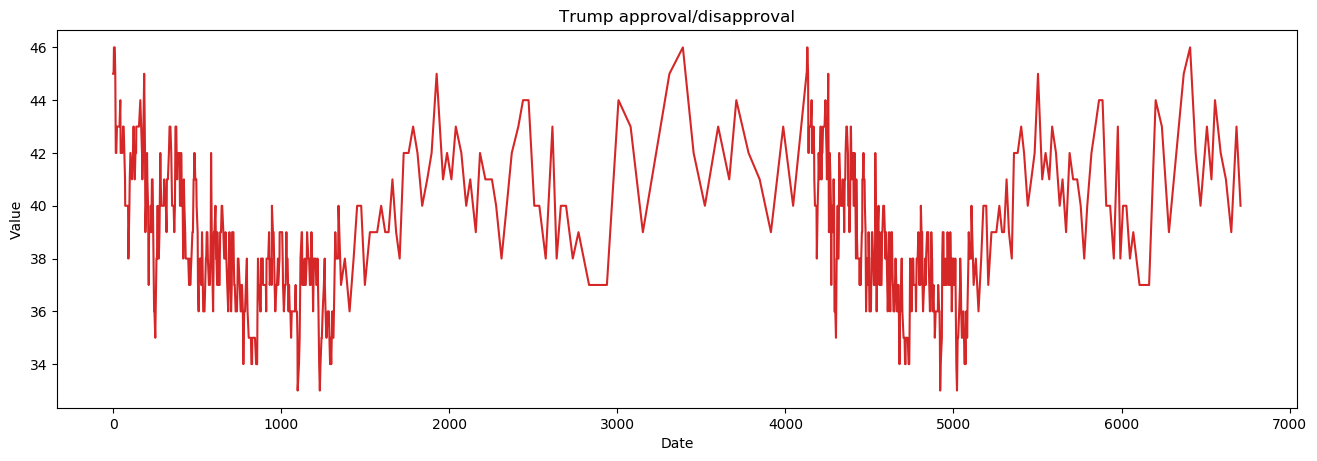

In [12]:
plot_df(approval_rating_df, x=approval_rating_df.index, y=approval_rating_df['approve'], title="Trump approval/disapproval")

In [49]:
# import csvs of twitter emotion analysis (taken from Yihao's analysis)
full_tweets_df = pd.read_csv('./data/emotional_analysis_res_week_9/re-reservoir_sampling_hydrated_100K_p.csv')
full_tweets_df = full_tweets_df[full_tweets_df['ID'].apply(lambda x: str(x).isdigit())]
full_tweets_df['ID'] = full_tweets_df['ID'].astype(int)

tweet_emotions_df = pd.read_csv('./data/emotional_analysis_res_week_9/re-reservoir_sampling_hydrated_100K_emo_label_p.csv')
tweet_emotions_df = tweet_emotions_df[tweet_emotions_df['ID'].apply(lambda x: str(x).isdigit())]
tweet_emotions_df['ID'] = tweet_emotions_df['ID'].astype(int)

all_data_df = pd.merge(full_tweets_df, tweet_emotions_df, on='ID')

In [50]:
all_data_df['DateTime'] = all_data_df['created_at']
df_emotions = pd.DataFrame(all_data_df.iloc[:, -2])
all_data_df.head(10)

,ID,created_at,full_text,entities,extended_entities,re_text,Tweet,Emotion,DateTime
0,0,Sun Jul 15 18:11:19 +0000 2018,RT @beth_belinky: @realDonaldTrump @WhiteHouse...,"{'hashtags': [{'indices': [70, 78], 'text': 'T...",NaN,"U.S. Code § - Whoever, owing allegiance to the...","U.S. Code § - Whoever, owing allegiance to the...",Joy,Sun Jul 15 18:11:19 +0000 2018
1,1,Sun Oct 08 04:32:41 +0000 2017,@realDonaldTrump why are you so dedicated to b...,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,why are you so dedicated to being the weakest ...,why are you so dedicated to being the weakest ...,Sadness,Sun Oct 08 04:32:41 +0000 2017
2,2,Fri Jun 09 03:02:53 +0000 2017,RT @Lawrence: Imagine the agony of a twitterle...,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,Imagine the agony of a twitterless night tonig...,Imagine the agony of a twitterless night tonig...,Sadness,Fri Jun 09 03:02:53 +0000 2017
3,3,Fri May 19 18:24:53 +0000 2017,RT @DanScavino: Dummy @DonLemon- \nYour hate i...,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,Dummy - Your hate is so sad. Have you ever ere...,Dummy - Your hate is so sad. Have you ever ere...,Sadness,Fri May 19 18:24:53 +0000 2017
4,4,Fri Dec 14 14:21:21 +0000 2018,@realDonaldTrump Why don't you use your money ...,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/9d...,Why don't you use your money to build it and t...,Why don't you use your money to build it and t...,Anger,Fri Dec 14 14:21:21 +0000 2018
5,5,Thu Apr 19 04:28:41 +0000 2018,RT @sweejeep: @realDonaldTrump As a native Cal...,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,"As a native Californian, you are a racist SOB,...","As a native Californian, you are a racist SOB,...",Fear,Thu Apr 19 04:28:41 +0000 2018
6,6,Mon Jul 23 13:14:14 +0000 2018,RT @Annakhait: @realDonaldTrump The truth come...,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,"The truth comes out... the Clintons, not Russia.","The truth comes out... the Clintons, not Russia.",Surprise,Mon Jul 23 13:14:14 +0000 2018
7,7,Mon Jun 25 16:39:37 +0000 2018,"@realDonaldTrump ""...we need people who will h...","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,"""...we need people who will help to Make Ameri...","""...we need people who will help to Make Ameri...",Joy,Mon Jun 25 16:39:37 +0000 2018
8,8,Wed Oct 25 23:50:33 +0000 2017,@realDonaldTrump @LouDobbs @FoxBusiness Under ...,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,"Under Trump, Made in America is losing out to ...","Under Trump, Made in America is losing out to ...",Disgust,Wed Oct 25 23:50:33 +0000 2017
9,9,Thu Jun 15 23:21:46 +0000 2017,@realDonaldTrump https://t.co/Rpgzjf7Njb,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,NaN,NaN,Joy,Thu Jun 15 23:21:46 +0000 2017


In [55]:
all_data_df.DateTime = all_data_df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%a %b %d %H:%M:%S %z %Y'))
# all_data_df.DateTime = all_data_df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%c'))
all_data_df.head(10)

,ID,created_at,full_text,entities,extended_entities,re_text,Tweet,Emotion,DateTime
0,0,Sun Jul 15 18:11:19 +0000 2018,RT @beth_belinky: @realDonaldTrump @WhiteHouse...,"{'hashtags': [{'indices': [70, 78], 'text': 'T...",NaN,"U.S. Code § - Whoever, owing allegiance to the...","U.S. Code § - Whoever, owing allegiance to the...",Joy,2018-07-15 18:11:19+00:00
1,1,Sun Oct 08 04:32:41 +0000 2017,@realDonaldTrump why are you so dedicated to b...,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,why are you so dedicated to being the weakest ...,why are you so dedicated to being the weakest ...,Sadness,2017-10-08 04:32:41+00:00
2,2,Fri Jun 09 03:02:53 +0000 2017,RT @Lawrence: Imagine the agony of a twitterle...,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,Imagine the agony of a twitterless night tonig...,Imagine the agony of a twitterless night tonig...,Sadness,2017-06-09 03:02:53+00:00
3,3,Fri May 19 18:24:53 +0000 2017,RT @DanScavino: Dummy @DonLemon- \nYour hate i...,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,Dummy - Your hate is so sad. Have you ever ere...,Dummy - Your hate is so sad. Have you ever ere...,Sadness,2017-05-19 18:24:53+00:00
4,4,Fri Dec 14 14:21:21 +0000 2018,@realDonaldTrump Why don't you use your money ...,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/9d...,Why don't you use your money to build it and t...,Why don't you use your money to build it and t...,Anger,2018-12-14 14:21:21+00:00
5,5,Thu Apr 19 04:28:41 +0000 2018,RT @sweejeep: @realDonaldTrump As a native Cal...,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,"As a native Californian, you are a racist SOB,...","As a native Californian, you are a racist SOB,...",Fear,2018-04-19 04:28:41+00:00
6,6,Mon Jul 23 13:14:14 +0000 2018,RT @Annakhait: @realDonaldTrump The truth come...,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,"The truth comes out... the Clintons, not Russia.","The truth comes out... the Clintons, not Russia.",Surprise,2018-07-23 13:14:14+00:00
7,7,Mon Jun 25 16:39:37 +0000 2018,"@realDonaldTrump ""...we need people who will h...","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,"""...we need people who will help to Make Ameri...","""...we need people who will help to Make Ameri...",Joy,2018-06-25 16:39:37+00:00
8,8,Wed Oct 25 23:50:33 +0000 2017,@realDonaldTrump @LouDobbs @FoxBusiness Under ...,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,"Under Trump, Made in America is losing out to ...","Under Trump, Made in America is losing out to ...",Disgust,2017-10-25 23:50:33+00:00
9,9,Thu Jun 15 23:21:46 +0000 2017,@realDonaldTrump https://t.co/Rpgzjf7Njb,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,NaN,NaN,Joy,2017-06-15 23:21:46+00:00


In [107]:
df_emotions.index = all_data_df.DateTime
all_data_df['Date'] = all_data_df.DateTime.apply(lambda x: x.date())
all_data_df['Month/Year'] = all_data_df['DateTime'].apply(lambda x: "%d/%d" % (x.date().month, x.date().year))
all_data_df.groupby(['Date', 'Emotion']).size()
all_data_df.groupby(['Month/Year', 'Emotion']).size()
all_data_df.rolling

Month/Year  Emotion 
1/2018      Anger        436
            Disgust      158
            Fear         710
            Joy         1807
            Sadness      305
            Surprise    1043
1/2019      Anger        170
            Disgust       73
            Fear         458
            Joy         1067
            Sadness      199
            Surprise     642
10/2017     Anger        661
            Disgust      284
            Fear        1046
            Joy         2223
            Sadness      521
            Surprise    1555
10/2018     Anger         94
            Disgust       45
            Fear         188
            Joy          541
            Sadness       89
            Surprise     269
11/2017     Anger        509
            Disgust      190
            Fear         730
            Joy         1796
            Sadness      371
            Surprise    1125
                        ... 
7/2018      Anger        157
            Disgust      100
            Fear      